# Time Series in Python

Time stamps reference particular moments in time (e.g., July 4th, 2015 at 7:00am).

Time intervals and periods reference a length of time between a particular beginning and end point; for example, the year 2015. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods comprising days).

Time deltas or durations reference an exact length of time (e.g., a duration of 22.56 seconds).

## the built-in datetime module and the third-party dateutil module 

the third-party dateutil module can parse dates from a variety of string formats

In [1]:
from datetime import datetime 
datetime(year=2020, month=7, day=4)

datetime.datetime(2020, 7, 4, 0, 0)

In [2]:
from dateutil import parser
date = parser.parse("4th of July, 2020")
date

datetime.datetime(2020, 7, 4, 0, 0)

In [3]:
date.strftime('%A')

'Saturday'

## NumPy’s datetime64

the datetime requires a very specific input format

In [4]:
import numpy as np
date = np.array('2020-07-04', dtype=np.datetime64)
date

array('2020-07-04', dtype='datetime64[D]')

In [5]:
# vectorized operations
date + np.arange(12)

array(['2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07',
       '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-11',
       '2020-07-12', '2020-07-13', '2020-07-14', '2020-07-15'],
      dtype='datetime64[D]')

In [6]:
# NumPy will infer the desired unit from the input

In [7]:
np.datetime64('2020-07-04')

numpy.datetime64('2020-07-04')

In [8]:
np.datetime64('2020-07-04 12:00')

numpy.datetime64('2020-07-04T12:00')

In [9]:
np.datetime64('2020-07-04 12:59:59.50', 'ns')

numpy.datetime64('2020-07-04T12:59:59.500000000')

## Pandas Timestamp

Pandas builds upon all the tools just discussed to provide a Timestamp object, which combines the ease-of-use of datetime and dateutil with the efficient storage and vectorized interface of numpy.datetime64.

In [10]:
# We can parse a flexibly formatted string date
import pandas as pd
date = pd.to_datetime("4th of July, 2020")
date

Timestamp('2020-07-04 00:00:00')

In [11]:
date.strftime('%A')

'Saturday'

In [12]:
# vectorized operations
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07',
               '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-11',
               '2020-07-12', '2020-07-13', '2020-07-14', '2020-07-15'],
              dtype='datetime64[ns]', freq=None)

In [13]:
# construct a Series object that has time indexed data
ind = pd.DatetimeIndex(['2019-07-04', '2019-08-04','2020-07-04', '2020-08-04'])
data = pd.Series([0, 1, 2, 3], index=ind)
data

2019-07-04    0
2019-08-04    1
2020-07-04    2
2020-08-04    3
dtype: int64

In [14]:
# slice (explicit index)
data['2019-07-04':'2020-07-04']

2019-07-04    0
2019-08-04    1
2020-07-04    2
dtype: int64

In [15]:
data['2020']

2020-07-04    2
2020-08-04    3
dtype: int64

In [16]:
# Passing a single date to pd.to datetime() yields a Timestamp; 
# passing a series of dates by default yields a DatetimeIndex.

from datetime import datetime
import pandas as pd
dates = pd.to_datetime([datetime(2020, 7, 3), '2020-Jul-6', '07-07-2020', '20200708'])
dates


DatetimeIndex(['2020-07-03', '2020-07-06', '2020-07-07', '2020-07-08'], dtype='datetime64[ns]', freq=None)

In [17]:
# Any DatetimeIndex can be converted to a PeriodIndex
dates.to_period('D')

PeriodIndex(['2020-07-03', '2020-07-06', '2020-07-07', '2020-07-08'], dtype='period[D]', freq='D')

In [18]:
# A TimedeltaIndex is created, for example, when a date is subtracted from another:
dates - dates[0]

TimedeltaIndex(['0 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [19]:
pd.date_range('2020-07-03', '2020-07-10')

DatetimeIndex(['2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06',
               '2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10'],
              dtype='datetime64[ns]', freq='D')

In [20]:
pd.date_range('2020-07-03', periods=8)

DatetimeIndex(['2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06',
               '2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10'],
              dtype='datetime64[ns]', freq='D')

In [21]:
pd.date_range('2020-07-03', periods=8, freq='H')

DatetimeIndex(['2020-07-03 00:00:00', '2020-07-03 01:00:00',
               '2020-07-03 02:00:00', '2020-07-03 03:00:00',
               '2020-07-03 04:00:00', '2020-07-03 05:00:00',
               '2020-07-03 06:00:00', '2020-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [22]:
pd.period_range('2020-07', periods=8, freq='M')

PeriodIndex(['2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
             '2021-01', '2021-02'],
            dtype='period[M]', freq='M')

In [23]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

## Resampling, Shifting, and Windowing

In [24]:
import pandas as pd
import yfinance as yf
goog_df = yf.download('GOOG', start='2004-01-01', end='2020-12-31', progress=False)

goog_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [25]:
goog = goog_df['Adj Close']
goog

Date
2004-08-19      49.982655
2004-08-20      53.952770
2004-08-23      54.495735
2004-08-24      52.239197
2004-08-25      52.802086
                 ...     
2020-12-23    1732.380005
2020-12-24    1738.849976
2020-12-28    1776.089966
2020-12-29    1758.719971
2020-12-30    1739.520020
Name: Adj Close, Length: 4121, dtype: float64

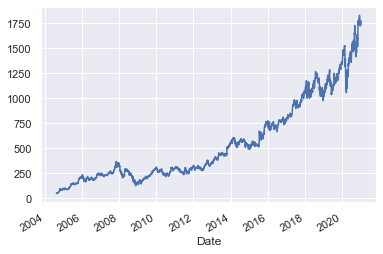

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
goog.plot();

The primary difference between the two is that resample() is fundamentally a data aggregation, while asfreq() is fundamentally a data selection.

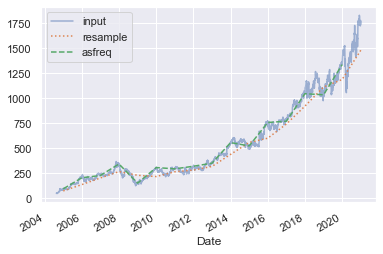

In [27]:
# resample and asfreq
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

## Time-shifts

the difference between them is that shift() shifts the data, while tshift() shifts the index.

<ipython-input-28-d1aa1efe3af9>:7: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  goog.tshift(900).plot(ax=ax[2])


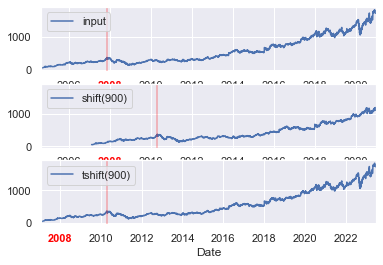

In [28]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')
goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')
ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')
ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')
ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

<ipython-input-29-500c6c126989>:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ROI = 100 * (goog.tshift(-365) / goog - 1)


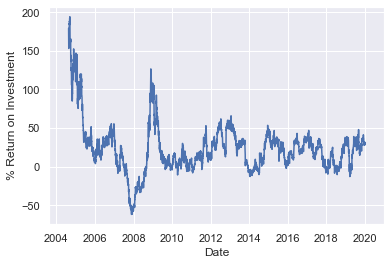

In [29]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

## Rolling windows

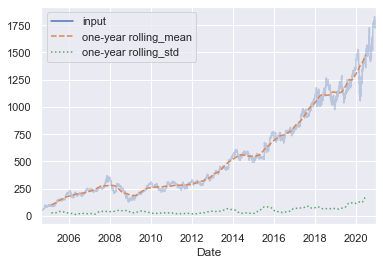

In [30]:
rolling = goog.rolling(365, center=True)
data = pd.DataFrame({'input': goog,'one-year rolling_mean': rolling.mean(),'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

## Seattle Bicycle Example

In [31]:
data = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv',index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [32]:
data.dropna().describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,143608.000000,143608.000000,143608.000000
mean,111.162735,50.547616,60.615119
std,141.443433,65.157096,87.921215
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,146.000000,68.000000,74.000000
max,1097.000000,698.000000,850.000000


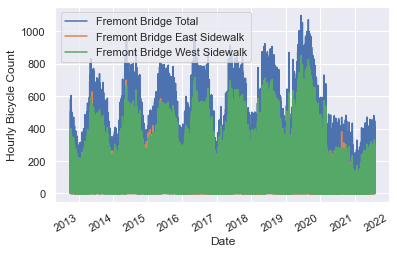

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()
data.plot()
plt.ylabel('Hourly Bicycle Count');

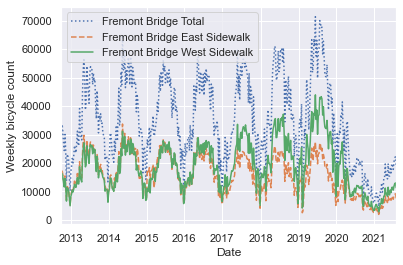

In [34]:
# weekly resample
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

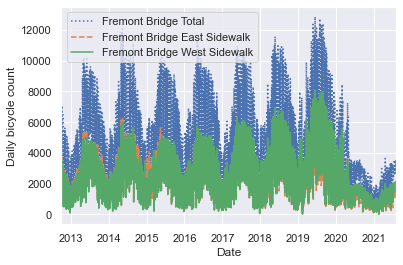

In [35]:
daily = data.resample('D').sum()
daily.plot(style=[':', '--', '-'])
plt.ylabel('Daily bicycle count');

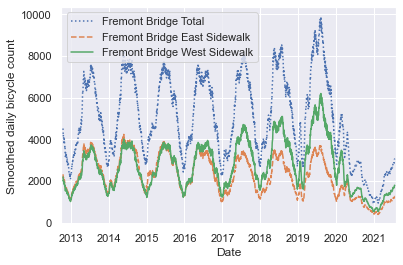

In [36]:
# 30 day rolling mean
daily.rolling(30, center=True).mean().plot(style=[':', '--', '-'])
plt.ylabel('Smoothed daily bicycle count');

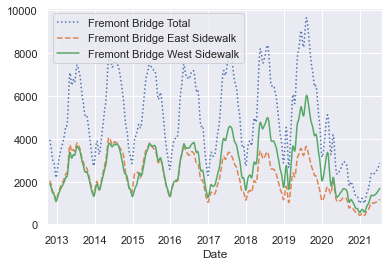

In [37]:
# to avoide cutoff through window function, we can set win_type = 'gaussian'
daily.rolling(50, center=True,
win_type='gaussian').mean(std=10).plot(style=[':', '--', '-']);

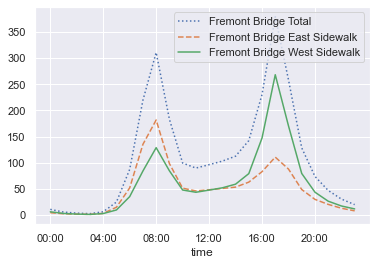

In [38]:
# dig the data from another perspective
by_time = data.groupby(data.index.time).mean() 
hourly_ticks = 4 * 60 * 60 * np.arange(6) 
by_time.plot(xticks=hourly_ticks,style=[':', '--', '-']);

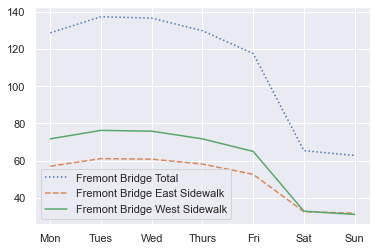

In [39]:
by_weekday = data.groupby(data.index.dayofweek).mean() 
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs','Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

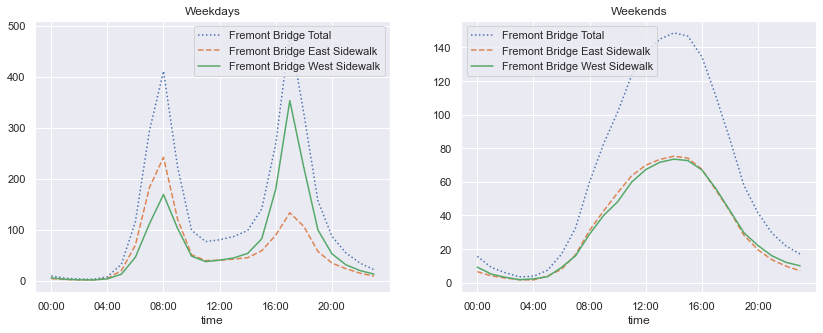

In [40]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
xticks=hourly_ticks, style=[':', '--', '-']);

## Seattle Bicycle Pridiction Example

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()

counts = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv',index_col='Date', parse_dates=True)
weather = pd.read_csv('SeattleWeather.csv',index_col='DATE', parse_dates=True, dayfirst = True)
counts.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [42]:
weather.head()

,STATION,NAME,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT04,WT05,WT08,WT09,WT13,WT14,WT16,WT17,WT18,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.51,NaN,NaN,0.00,0.0,0.0,NaN,55,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2012-01-02,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.07,NaN,NaN,0.43,0.0,0.0,NaN,51,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2012-01-03,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",5.14,NaN,NaN,0.03,0.0,0.0,NaN,53,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2012-01-04,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.51,NaN,NaN,0.80,0.0,0.0,NaN,54,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2012-01-05,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",13.65,NaN,NaN,0.05,0.0,0.0,NaN,48,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


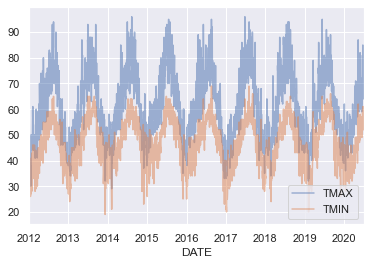

In [43]:
weather[['TMAX','TMIN']].plot(alpha=0.5);

In [44]:
# adding binary columns that indicate the day of the week
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)
daily

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,,,
2012-10-03,7042.0,3520.0,3522.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,6950.0,3416.0,3534.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,6296.0,3116.0,3180.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,4012.0,2160.0,1852.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,4284.0,2382.0,1902.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2021-07-27,3554.0,1418.0,2136.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2021-07-28,3541.0,1400.0,2141.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2021-07-29,3282.0,1283.0,1999.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [45]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2021')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

(8.0, 17.0)

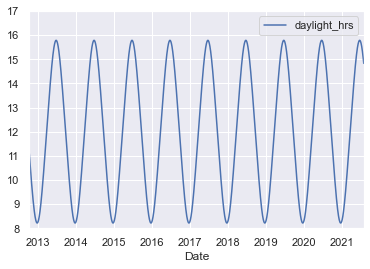

In [46]:
from datetime import datetime

def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))* np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.
   
daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

In [47]:
weather['Temp'] = 0.5 * (weather['TMIN'] + weather['TMAX'])
weather['dry_day'] = (weather['PRCP'] == 0).astype(int)
daily = daily.join(weather[['PRCP', 'Temp', 'dry_day']])

In [48]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [49]:
daily.head(10)

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp,dry_day,annual
Date,,,,,,,,,,,,,,,,
2012-10-03,7042.0,3520.0,3522.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.00,56.0,1.0,0.000000
2012-10-04,6950.0,3416.0,3534.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.00,56.5,1.0,0.002740
2012-10-05,6296.0,3116.0,3180.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.00,59.5,1.0,0.005479
2012-10-06,4012.0,2160.0,1852.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.00,60.5,1.0,0.008219
2012-10-07,4284.0,2382.0,1902.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.00,60.5,1.0,0.010959
2012-10-08,7074.0,3658.0,3416.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.987503,0.00,58.0,1.0,0.013699
2012-10-09,7002.0,3518.0,3484.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.929950,0.00,54.5,1.0,0.016438
2012-10-10,6470.0,3296.0,3174.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10.872560,0.00,50.5,1.0,0.019178
2012-10-11,6094.0,3158.0,2936.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.815345,0.00,51.0,1.0,0.021918


In [50]:
daily.describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp,dry_day,annual
count,3224.000000,3224.000000,3224.000000,3224.00000,3224.00000,3224.000000,3224.000000,3224.000000,3224.000000,3224.00000,3224.000000,3224.000000,2829.000000,2829.000000,2829.000000,3224.000000
mean,4951.568859,2251.563896,2700.004963,0.14268,0.14268,0.142990,0.142990,0.142990,0.142990,0.14268,0.026365,11.977950,0.118045,54.087133,0.562036,4.415068
std,2801.001733,1251.321994,1645.262326,0.34980,0.34980,0.350117,0.350117,0.350117,0.350117,0.34980,0.160242,2.623281,0.262029,10.768405,0.496224,2.550227
min,11.000000,9.000000,2.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,8.218894,0.000000,25.000000,0.000000,0.000000
25%,2694.000000,1233.750000,1439.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,9.419465,0.000000,46.000000,0.000000,2.207534
50%,4562.000000,2136.000000,2347.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,11.930060,0.000000,53.000000,1.000000,4.415068
75%,6972.000000,3124.500000,3875.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,14.562709,0.110000,63.000000,1.000000,6.622603
max,12856.000000,6286.000000,8100.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,15.781095,3.250000,82.000000,1.000000,8.830137


In [51]:
from sklearn.linear_model import LinearRegression
daily.dropna(axis=0, how='any', inplace=True)
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun','holiday', 
                'daylight_hrs', 'PRCP', 'Temp', 'dry_day', 'annual']
X = daily[column_names]
y = daily['Fremont Bridge Total']

# We will set fit intercept = False, because the daily flags essentially operate as their own day-specific intercepts
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

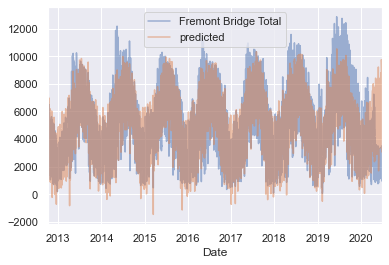

In [52]:
daily[['Fremont Bridge Total', 'predicted']].plot(alpha=0.5);

In [53]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon            -1002.616919
Tue             -809.856363
Wed             -851.055968
Thu            -1090.873151
Fri            -1740.830001
Sat            -4414.136588
Sun            -4569.728370
holiday        -2489.604232
daylight_hrs      99.699401
PRCP           -1391.304292
Temp             104.094055
dry_day         1102.689188
annual            57.299850
dtype: float64

We can compute these uncertainties quickly using bootstrap resamplings

In [54]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_ for i in range(1000)], 0)

In [55]:
print(pd.DataFrame({'effect': params.round(0),'error': err.round(0)}))

              effect  error
Mon          -1003.0  163.0
Tue           -810.0  167.0
Wed           -851.0  163.0
Thu          -1091.0  161.0
Fri          -1741.0  160.0
Sat          -4414.0  164.0
Sun          -4570.0  167.0
holiday      -2490.0  198.0
daylight_hrs   100.0   16.0
PRCP         -1391.0   96.0
Temp           104.0    4.0
dry_day       1103.0   61.0
annual          57.0   14.0
